Titouan LESTANGUET

On va chercher à répondre à 3 questions:
 - Il y a t-il véritablement un déploiement d'énérgie solaire en France ces dernières années ?
   Pour cela on étudiera les cas de l'occitanie et de la région PACA
- Laquelle de ces régions à la croissance la plus rapide ?
- Evolution de l'énergie nucléaire et totale produite depuis 2014 à l'échelle de la France.
   

In [1]:
import pandas as pd

In [2]:
url= "https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/production-regionale-mensuelle-filiere/exports/csv?lang=fr&timezone=Europe%2FParis&use_labels=true&delimiter=%2C"
data = pd.read_csv(url)


In [3]:
data.head()

,Mois,Code INSEE région,Région,Production nucléaire (GWh),Production thermique (GWh),Production hydraulique (GWh),Production éolienne (GWh),Production solaire (GWh),Production bioénergies (GWh),Géo-shape région,Géo-point région
0,2014-01,24,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982,"{""coordinates"": [[[[1.501397407, 48.941034037]...","47.48477569, 1.684391194"
1,2014-01,76,Occitanie,1795.001,46.766,1337.231,177.556,40.352,61.085,"{""coordinates"": [[[[-0.07519535, 43.307155125]...","43.702500286, 2.143923389"
2,2015-01,32,Hauts-de-France,3892.397,723.550,1.557,534.662,3.034,83.487,"{""coordinates"": [[[[3.485019233, 48.851845323]...","49.969517433, 2.771371932"
3,2015-01,53,Bretagne,NaN,80.293,58.036,183.816,5.779,25.891,"{""coordinates"": [[[[-3.194814966, 47.365416018...","48.177551218, -2.841488793"
4,2016-01,28,Normandie,5343.125,533.412,14.264,186.697,3.419,36.424,"{""coordinates"": [[[[1.704350137, 49.232434495]...","49.120061533, 0.110938291"


Certaines colonnes ne présentent aucun intéret pour notre étude on les supprime donc.

In [4]:
del data["Géo-shape région"]
del data["Géo-point région"]
del data["Code INSEE région"]

In [5]:
data.head()

,Mois,Région,Production nucléaire (GWh),Production thermique (GWh),Production hydraulique (GWh),Production éolienne (GWh),Production solaire (GWh),Production bioénergies (GWh)
0,2014-01,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982
1,2014-01,Occitanie,1795.001,46.766,1337.231,177.556,40.352,61.085
2,2015-01,Hauts-de-France,3892.397,723.550,1.557,534.662,3.034,83.487
3,2015-01,Bretagne,NaN,80.293,58.036,183.816,5.779,25.891
4,2016-01,Normandie,5343.125,533.412,14.264,186.697,3.419,36.424


Certaines régions ne produisent pas certain type d'énérgie (par exemple nucléaire en Bretagne) d'où la nécessité de traiter ces cases.

In [6]:
data = data.fillna(0)

In [7]:
data.head()

,Mois,Région,Production nucléaire (GWh),Production thermique (GWh),Production hydraulique (GWh),Production éolienne (GWh),Production solaire (GWh),Production bioénergies (GWh)
0,2014-01,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982
1,2014-01,Occitanie,1795.001,46.766,1337.231,177.556,40.352,61.085
2,2015-01,Hauts-de-France,3892.397,723.550,1.557,534.662,3.034,83.487
3,2015-01,Bretagne,0.000,80.293,58.036,183.816,5.779,25.891
4,2016-01,Normandie,5343.125,533.412,14.264,186.697,3.419,36.424


Par soucis de simplicité dans la suite des manipulations on renomme les colonnes

In [8]:
data.rename(columns={    "Région": "region",
    "Production nucléaire (GWh)": "nuc",
    "Production thermique (GWh)": "thermo",
    "Production hydraulique (GWh)": "hydro",
    "Production éolienne (GWh)": "vent",
    "Production solaire (GWh)": "solaire",
    "Production bioénergies (GWh)": "bio",
}, inplace=True)

In [9]:
data.head()

,Mois,region,nuc,thermo,hydro,vent,solaire,bio
0,2014-01,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982
1,2014-01,Occitanie,1795.001,46.766,1337.231,177.556,40.352,61.085
2,2015-01,Hauts-de-France,3892.397,723.550,1.557,534.662,3.034,83.487
3,2015-01,Bretagne,0.000,80.293,58.036,183.816,5.779,25.891
4,2016-01,Normandie,5343.125,533.412,14.264,186.697,3.419,36.424


On ajoute une colonne totale pour la production mensuelle de chaque région.

In [10]:
data["total"]=data.loc[:,'nuc':'bio'].sum(axis=1)

In [11]:
data.head()

,Mois,region,nuc,thermo,hydro,vent,solaire,bio,total
0,2014-01,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982,8353.121
1,2014-01,Occitanie,1795.001,46.766,1337.231,177.556,40.352,61.085,3457.991
2,2015-01,Hauts-de-France,3892.397,723.550,1.557,534.662,3.034,83.487,5238.687
3,2015-01,Bretagne,0.000,80.293,58.036,183.816,5.779,25.891,353.815
4,2016-01,Normandie,5343.125,533.412,14.264,186.697,3.419,36.424,6117.341


Afin de tracer des courbes production=f(Mois) on convertit la colonne mois dans le bon format

In [12]:
data["Mois"]=pd.to_datetime(data["Mois"])
data=data.sort_values(by='Mois')

In [13]:
data.head(20)

,Mois,region,nuc,thermo,hydro,vent,solaire,bio,total
0,2014-01-01,Centre-Val de Loire,8017.913,55.139,23.242,214.293,5.552,36.982,8353.121
309,2014-01-01,Pays de la Loire,0.000,376.948,2.624,144.194,9.624,29.175,562.565
308,2014-01-01,Grand Est,8071.439,733.342,712.217,535.483,13.175,53.794,10119.450
834,2014-01-01,Corse,0.000,46.399,93.234,2.519,5.870,1.024,149.046
833,2014-01-01,Provence-Alpes-Côte d'Azur,0.000,216.856,984.431,8.226,34.599,51.914,1296.026
571,2014-01-01,Hauts-de-France,4008.641,476.210,1.564,525.158,2.911,70.185,5084.669
307,2014-01-01,Normandie,7354.684,395.762,16.013,156.651,2.868,36.190,7962.168
832,2014-01-01,Nouvelle-Aquitaine,3871.550,63.383,627.492,98.886,30.887,80.874,4773.072
305,2014-01-01,Île-de-France,0.000,334.080,1.827,5.468,1.568,94.012,436.955
572,2014-01-01,Bretagne,0.000,59.546,57.834,200.069,5.019,21.885,344.353


In [14]:
import matplotlib.pyplot as plt
import numpy as np

On trace en base 100 l'évolution de la production solaire en Occitanie et Paca

In [15]:
X=data[data["region"]=="Provence-Alpes-Côte d'Azur"]["Mois"]
Y=np.array(data[data["region"]=="Provence-Alpes-Côte d'Azur"]["solaire"])
Y=(Y/Y[0])*100
Y1=np.array(data[data["region"]=="Occitanie"]["solaire"])
Y1=(Y1/Y1[0])*100

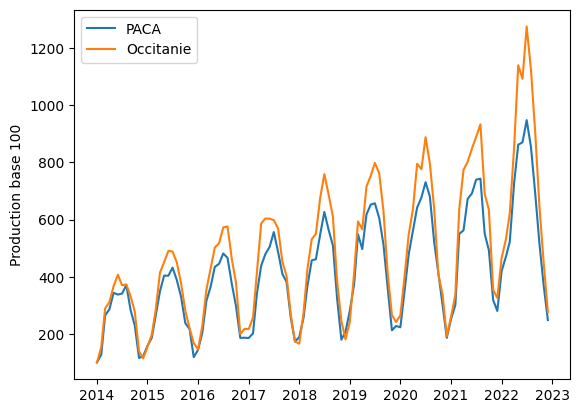

In [16]:
plt.plot(X,Y,label="PACA")
plt.plot(X,Y1,label="Occitanie")
plt.legend()
plt.ylabel("Production base 100")
plt.show()

On observe que la production est particulièrement sensible aux parametres saisonniers et que la production de l'occitanie croit plus rapidement que celle de la région Paca.

Afin de récupérer la production nationale mensuelle on agrége les données selon les mois.

In [17]:
mois = data.groupby(by='Mois')

In [18]:
B=mois.sum()

In [19]:
B

,region,nuc,thermo,hydro,vent,solaire,bio,total
Mois,,,,,,,,
2014-01-01,Centre-Val de LoirePays de la LoireGrand EstCo...,42697.272,3034.379,7033.054,2181.929,176.352,624.701,55747.687
2014-02-01,Bourgogne-Franche-ComtéCorseAuvergne-Rhône-Alp...,36396.234,2571.052,7063.117,2472.573,262.652,573.121,49338.749
2014-03-01,OccitanieCorseNormandieHauts-de-FranceGrand Es...,35796.055,2829.308,6982.530,1282.374,534.329,619.024,48043.620
2014-04-01,Auvergne-Rhône-AlpesPays de la LoireOccitanieB...,31206.547,1420.786,5782.961,1048.400,584.360,533.257,40576.311
2014-05-01,Pays de la LoireGrand EstNouvelle-AquitaineHau...,31710.544,993.297,6131.679,1519.585,681.609,608.694,41645.408
...,...,...,...,...,...,...,...,...
2022-08-01,BretagneAuvergne-Rhône-AlpesÎle-de-FranceOccit...,18133.046,3034.803,2684.853,2071.697,2266.205,863.946,29054.550
2022-09-01,Auvergne-Rhône-AlpesOccitanieProvence-Alpes-Cô...,18190.495,3345.546,2442.534,2293.444,1790.723,883.112,28945.854
2022-10-01,OccitanieBretagneNormandieCentre-Val de LoireG...,20224.827,3879.511,3034.336,3518.071,1270.251,832.887,32759.883


Text(0, 0.5, 'Production en GWh')

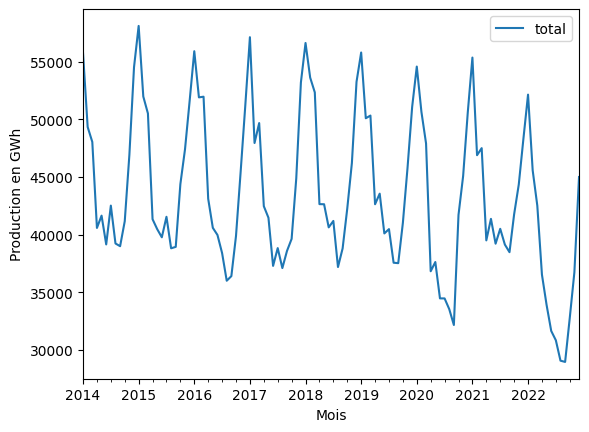

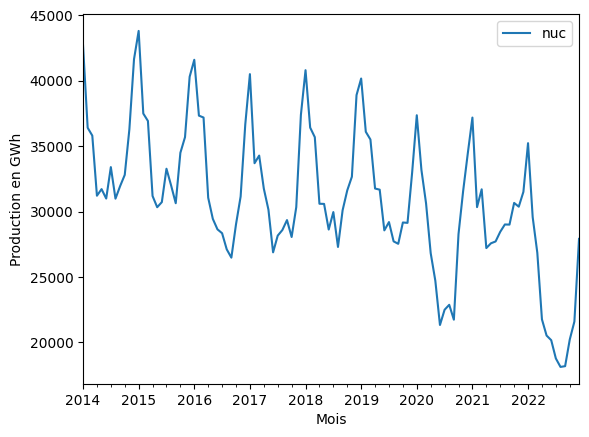

In [20]:
B.plot(y='total')
plt.ylabel("Production en GWh")
B.plot(y='nuc')
plt.ylabel("Production en GWh")

On constate une légère baisse de la production totale d'éléctricité à l'échelle du pays et une baisse de l'ordre de 5 TWh de la production nucléaire au moment des mois d'hiver.